# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [ ]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X_scaled)

In [ ]:
principal_components[:,0]

array([-2.91302459e+00,  4.29911330e-01, -2.85225077e-01, -2.93242265e+00,
        1.03357587e+00,  2.24072616e-02, -1.01583737e-01,  2.34216461e+00,
        2.97376366e+00, -1.81486997e-01,  1.26874386e+00,  1.67099640e+00,
       -1.12385093e+00,  1.08137420e+00,  5.80025152e-01,  3.14378596e+00,
        2.11255447e-01, -2.67231388e+00, -1.56570962e-01, -7.93851561e-01,
        9.95867143e-01, -8.82087639e-01,  1.40781361e-01,  2.46008609e+00,
        9.06594515e-01, -3.12205344e+00, -2.89897068e+00, -5.82411867e-01,
       -2.80790857e+00,  2.54363055e+00, -1.55801452e-01, -3.96496402e+00,
       -3.55755520e+00,  9.51656055e-01,  5.74819803e-02,  1.21146120e-01,
       -2.09355643e+00, -3.17337012e+00, -1.72567641e+00,  9.37826615e-01,
       -2.58170623e+00,  1.14886344e+00,  2.17445492e+00,  2.05326329e+00,
        3.01049182e+00, -2.31102923e-01,  9.61833240e-03, -8.48186699e-01,
        8.18678445e-02, -1.29342284e+00, -2.47469590e+00,  1.65908340e+00,
       -1.88828409e-01,  

# 2.) Plot a Scatter plot of the PCs on the axis

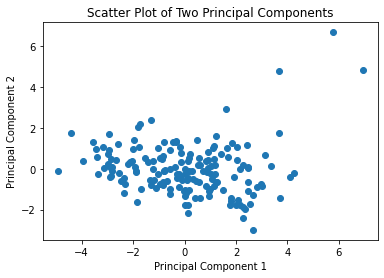

In [ ]:
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Two Principal Components')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [ ]:
# Get the absolute values of the feature loadings
loadings = np.abs(pca.components_)

# Sort the features by their average loading across the principal components
feature_ranking = np.argsort(np.mean(loadings, axis=0))[::-1]

# Print the ranked features
print("Ranking of features by importance according to PCA:")
for i, feature_index in enumerate(feature_ranking):
    print(f"{i+1}. {df.columns[feature_index+1]}")

Ranking of features by importance according to PCA:
1. exports
2. imports
3. life_expec
4. child_mort
5. total_fer
6. gdpp
7. income
8. health
9. inflation


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [ ]:
feature_names = df.columns[1:]

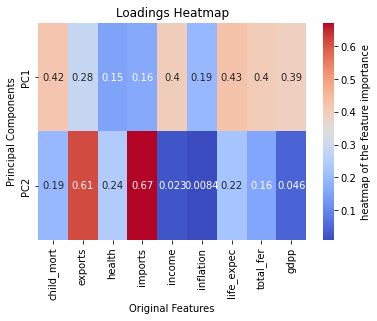

In [ ]:
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=['PC1','PC2' ], cbar_kws={'label':'heatmap of the feature importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

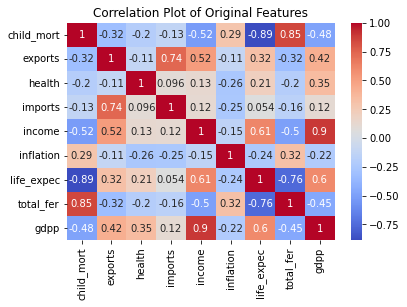

In [ ]:
sns.heatmap(X.corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Plot of Original Features')
plt.show()

I notice that there is some overlap between the two graphs. Specifically, the features that are most important according to the PCA tend to be highly correlated with other features in the original data, for example gdp and income are highly positively correlated.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [ ]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

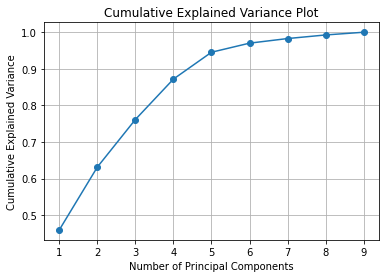

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

The plot shows that 95% of the variance is explained by the first 6 principal components, so we should retain these 6 components to retain 95% of the variance.